In [5]:
from sklearn.datasets import make_regression
import numpy as np

In [6]:
x,y=make_regression(n_samples=4,n_features=1,n_informative=1,noise=80,random_state=13)

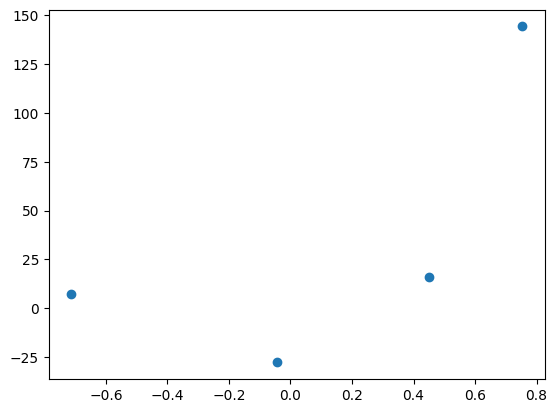

In [7]:
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x,y)
print("slope: ",reg.coef_)
print("Intercept: ",reg.intercept_)

slope:  [78.35063668]
Intercept:  26.15963284313262


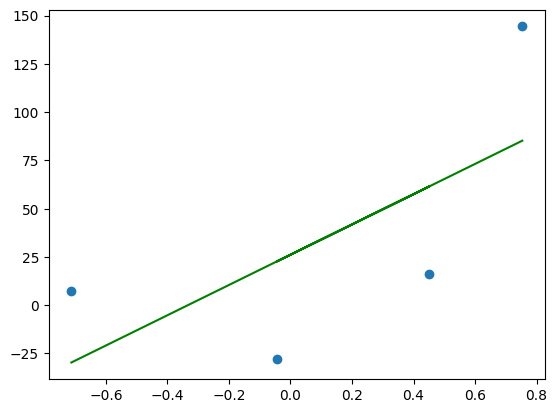

In [9]:
plt.scatter(x,y)
plt.plot(x,reg.predict(x),color="green")
plt.show()

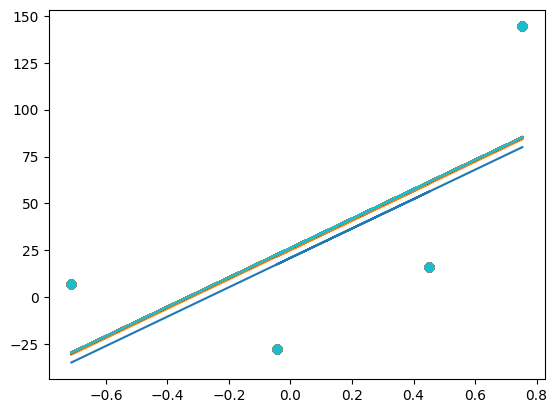

In [10]:
b1=0
m1=78.35
lr=0.1
epochs=100
for i in range(epochs):
    loss_slope=-2*np.sum(y-m1*x.ravel()-b1)
    b1=b1-(lr*loss_slope)
    y_pred=m1*x+b1
    plt.plot(x,y_pred)
    plt.scatter(x,y)


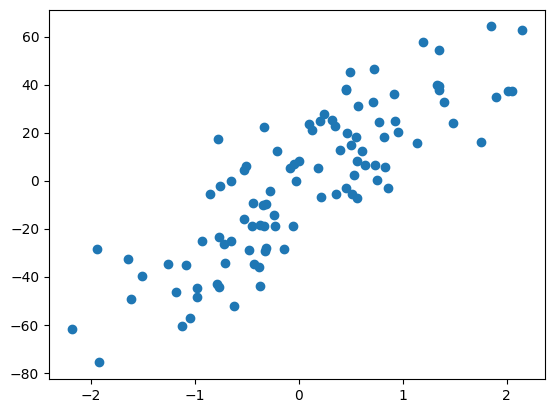

In [11]:
x_1,y_1=make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20,random_state=13)
plt.scatter(x_1,y_1)
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
x_1_train,x_1_test,y_1_train,y_1_test=train_test_split(x_1,y_1,test_size=0.2,random_state=2)
lr=LinearRegression()
lr.fit(x_1_train,y_1_train)
print(lr.coef_)
print(lr.intercept_)

[28.12597332]
-2.2710144261783825


In [13]:
y_1_pred=lr.predict(x_1_test)
from sklearn.metrics import r2_score
r2_score(y_1_test,y_1_pred)

0.6345158782661012

In [14]:
class GDRegressor:
    def __init__(self,learning_rate,epochs):
        self.m=100
        self.b=-120
        self.lr=learning_rate
        self.epochs=epochs
    def fit(self,x,y):
        # calculate the b and m using GD_Regressor
        for i in range(self.epochs):
            loss_slope_b=-2*np.sum(y-self.m*x.ravel()-self.b)
            loss_slope_m=-2*np.sum((y-self.m*x.ravel()-self.b)*x.ravel())
            
            self.b=self.b-(self.lr*loss_slope_b)
            self.m=self.m-(self.lr*loss_slope_m)    
        print(self.m,self.b)
    def predict(self,x):
        return self.m*x+self.b
            

In [16]:
gd=GDRegressor(0.001,50)
gd.fit(x_1_train,y_1_train)

28.159367347119066 -2.3004574196824854


In [18]:
y_2_pred=gd.predict(x_1_test)
from sklearn.metrics import r2_score
r2_score(y_1_test,y_2_pred)

0.6343842836315579